# [Medical Data Visualizer](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)

## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

![alt text](data_table.png)

## Tasks
Create a chart similar to the provided examples, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:
1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like an example below.

![alt text](example_1.png)

4. Clean the data. Filter out the following patient segments that represent incorrect data: 
    * diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']));
    * height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)));
    * height is more than the 97.5th percentile;
    * weight is less than the 2.5th percentile;
    * weight is more than the 97.5th percentile;
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like this example.

![alt text](example_2.png)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

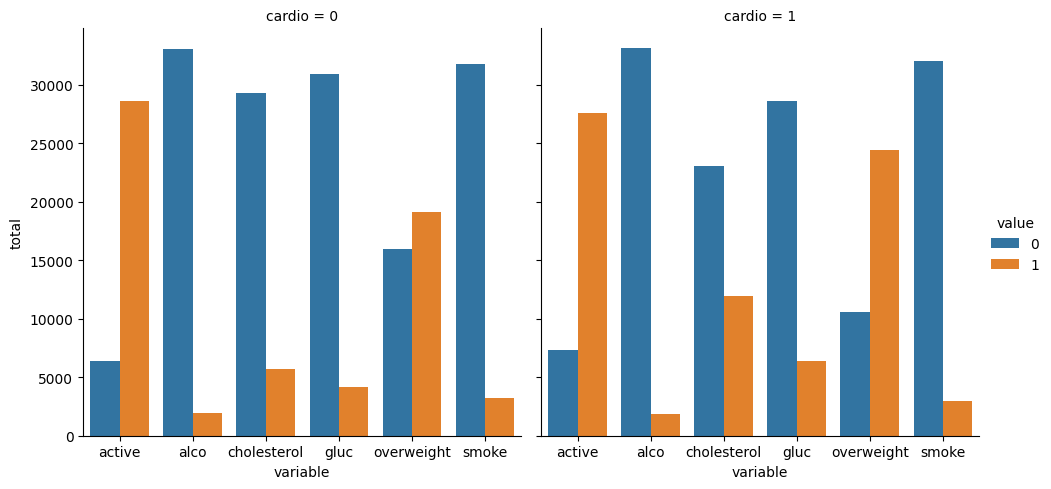

In [24]:
#loading data;
df = pd.read_csv('medical_examination.csv')

#identifying overweight patients;
df['overweight'] = np.where((df.weight / (df.height/100)**2) > 25, 1, 0)

#normalizing data;
df['cholesterol'] = np.where(df.cholesterol > 1, 1, 0)
df['gluc'] = np.where(df.gluc > 1, 1, 0)

#plotting categorical data grouped by 'cardio' variable; 
df_cat = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count').set_ylabels('total')
plt.show()

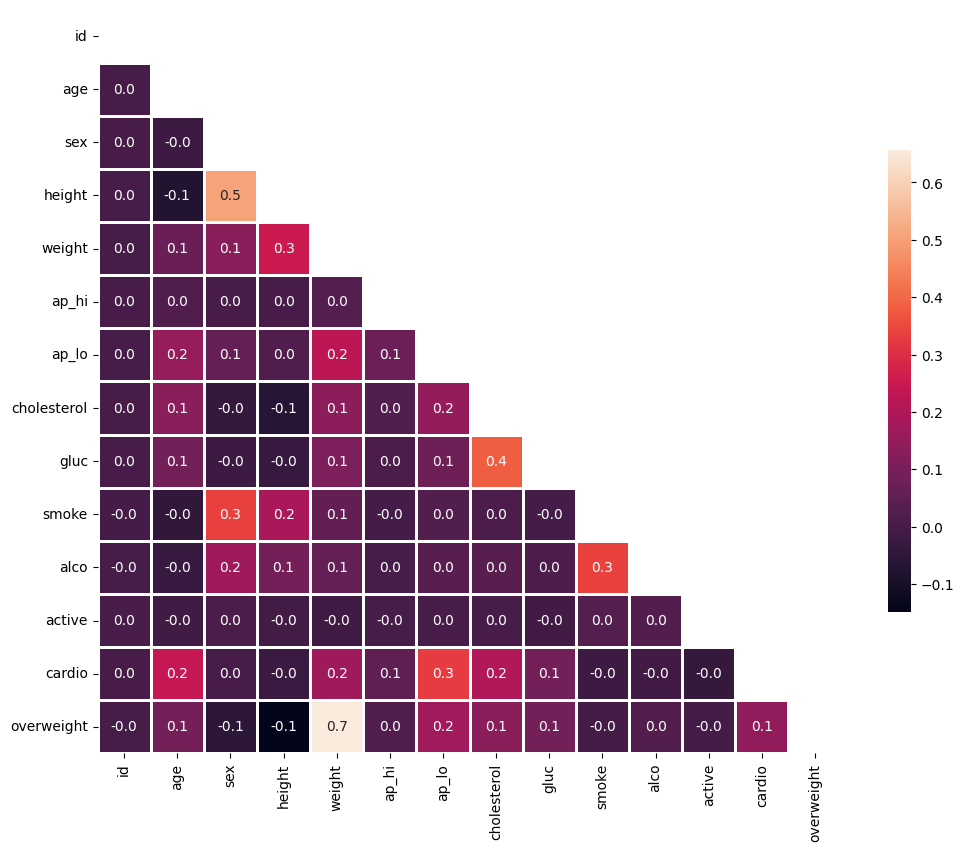

In [25]:
#filtering data;
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))
            ]

#creating correlation matrix;
corr = df_heat.corr()

#initializing a mask for corr matrix;
mask = np.triu(np.ones(corr.shape, dtype=bool))

#plotting the heatmap;
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr, annot = True, square=True, mask=mask, ax=ax, fmt=".1f", linewidths=1, cbar_kws={'shrink':0.5})
plt.show()
